<a href="https://colab.research.google.com/github/ssabrut/SMS_Spam_Collection_Dataset/blob/main/SMS_Spam_Collection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

!pip install -q kaggle
uploaded = files.upload()

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

In [ ]:
import zipfile

local_zip = '/content/sms-spam-collection-dataset.zip'
zip = zipfile.ZipFile(local_zip, 'r')
zip.extractall()
zip.close()

In [ ]:
import csv

text, label = [], []
with open('/content/spam.csv', 'r', encoding = 'ISO-8859-1') as f:
  reader = csv.reader(f, delimiter = ',')

  for row in reader:
    label.append(row[0])
    text.append(row[1])

In [ ]:
import pandas as pd

df = pd.DataFrame(list(zip(text, label)), columns = ['text', 'label'])
df.head(10)

,text,label
0,v2,v1
1,"Go until jurong point, crazy.. Available only ...",ham
2,Ok lar... Joking wif u oni...,ham
3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
4,U dun say so early hor... U c already then say...,ham
5,"Nah I don't think he goes to usf, he lives aro...",ham
6,FreeMsg Hey there darling it's been 3 week's n...,spam
7,Even my brother is not like to speak with me. ...,ham
8,As per your request 'Melle Melle (Oru Minnamin...,ham
9,WINNER!! As a valued network customer you have...,spam


In [ ]:
new_df = df.drop(0)
new_df.head(10)

,text,label
1,"Go until jurong point, crazy.. Available only ...",ham
2,Ok lar... Joking wif u oni...,ham
3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
4,U dun say so early hor... U c already then say...,ham
5,"Nah I don't think he goes to usf, he lives aro...",ham
6,FreeMsg Hey there darling it's been 3 week's n...,spam
7,Even my brother is not like to speak with me. ...,ham
8,As per your request 'Melle Melle (Oru Minnamin...,ham
9,WINNER!! As a valued network customer you have...,spam
10,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
print(new_df.shape)
print(new_df.isnull().sum())

(5572, 2)
text     0
label    0
dtype: int64


In [ ]:
import re

def remove_hyperlinks(text):
  sentence = re.sub(r'www?:\/\/.*[\r\n]*', '', text)
  sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)
  return re.sub(r'http?:\/\/.*[\r\n]*', '', sentence)

def remove_currencies(text):
  return re.sub(r'[\$\d+\d+\$]', '', text)

def remove_number(text):
  return re.sub(r'\d+', '', text)

new_df['text'] = new_df['text'].apply(lambda x: remove_hyperlinks(x.lower()))
new_df['text'] = new_df['text'].apply(lambda x: remove_currencies(x))
new_df['text'] = new_df['text'].apply(lambda x: remove_number(x))
new_df.head(10)

,text,label
1,"go until jurong point, crazy.. available only ...",ham
2,ok lar... joking wif u oni...,ham
3,free entry in a wkly comp to win fa cup final...,spam
4,u dun say so early hor... u c already then say...,ham
5,"nah i don't think he goes to usf, he lives aro...",ham
6,freemsg hey there darling it's been week's no...,spam
7,even my brother is not like to speak with me. ...,ham
8,as per your request 'melle melle (oru minnamin...,ham
9,winner!! as a valued network customer you have...,spam
10,had your mobile months or more? u r entitled ...,spam


In [ ]:
import string

def remove_punctuation(text):
  return ''.join([word for word in text if word not in string.punctuation])

def tokenize(text):
  return re.split('\W+', text)

new_df['text'] = new_df['text'].apply(lambda x: remove_punctuation(x))
new_df['text'] = new_df['text'].apply(lambda x: tokenize(x))
new_df.head(10)

,text,label
1,"[go, until, jurong, point, crazy, available, o...",ham
2,"[ok, lar, joking, wif, u, oni]",ham
3,"[free, entry, in, a, wkly, comp, to, win, fa, ...",spam
4,"[u, dun, say, so, early, hor, u, c, already, t...",ham
5,"[nah, i, dont, think, he, goes, to, usf, he, l...",ham
6,"[freemsg, hey, there, darling, its, been, week...",spam
7,"[even, my, brother, is, not, like, to, speak, ...",ham
8,"[as, per, your, request, melle, melle, oru, mi...",ham
9,"[winner, as, a, valued, network, customer, you...",spam
10,"[had, your, mobile, months, or, more, u, r, en...",spam


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword = stopwords.words('english')
def remove_stopword(text):
  return [word for word in text if word not in stopword]

new_df['text'] = new_df['text'].apply(lambda x: remove_stopword(x))
new_df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
1,"[go, jurong, point, crazy, available, bugis, n...",ham
2,"[ok, lar, joking, wif, u, oni]",ham
3,"[free, entry, wkly, comp, win, fa, cup, final,...",spam
4,"[u, dun, say, early, hor, u, c, already, say]",ham
5,"[nah, dont, think, goes, usf, lives, around, t...",ham
6,"[freemsg, hey, darling, weeks, word, back, id,...",spam
7,"[even, brother, like, speak, treat, like, aids...",ham
8,"[per, request, melle, melle, oru, minnaminungi...",ham
9,"[winner, valued, network, customer, selected, ...",spam
10,"[mobile, months, u, r, entitled, update, lates...",spam


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text])

new_df['text'] = new_df['text'].apply(lambda x: lemmatize(x))
new_df.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
1,go jurong point crazy available bugis n great ...,ham
2,ok lar joking wif u oni,ham
3,free entry wkly comp win fa cup final tkts st ...,spam
4,u dun say early hor u c already say,ham
5,nah dont think go usf life around though,ham
6,freemsg hey darling week word back id like fun...,spam
7,even brother like speak treat like aid patent,ham
8,per request melle melle oru minnaminunginte nu...,ham
9,winner valued network customer selected receiv...,spam
10,mobile month u r entitled update latest colour...,spam


In [ ]:
label = pd.get_dummies(df['label'])
last_df = pd.concat([new_df, label], axis = 1)
last_df = last_df.drop(0)
last_df = last_df.drop(['label', 'ham', 'v1'], axis = 1)
last_df = last_df.rename(columns = {'spam': 'label'})
last_df.head(10)

,text,label
1,go jurong point crazy available bugis n great ...,0
2,ok lar joking wif u oni,0
3,free entry wkly comp win fa cup final tkts st ...,1
4,u dun say early hor u c already say,0
5,nah dont think go usf life around though,0
6,freemsg hey darling week word back id like fun...,1
7,even brother like speak treat like aid patent,0
8,per request melle melle oru minnaminunginte nu...,0
9,winner valued network customer selected receiv...,1
10,mobile month u r entitled update latest colour...,1


In [ ]:
text = last_df['text'].values
label = last_df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size = 0.4, random_state = 0)

In [ ]:
print('Train text: ', len(text_train))
print('Test text: ', len(text_test))
print('Train label: ', len(label_train))
print('Test label: ', len(label_test))

Train text:  3343
Test text:  2229
Train label:  3343
Test label:  2229


In [ ]:
print('Train text shape: ', text_train.shape)
print('Test text shape: ', text_test.shape)
print('Train label shape: ', label_train.shape)
print('Test label shape: ', label_test.shape)

Train text shape:  (3343,)
Test text shape:  (2229,)
Train label shape:  (3343,)
Test label shape:  (2229,)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

num_words = 5000
oov_token = '<OOV>'
filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
output_dim = 64

tokenizer = Tokenizer(num_words = num_words, oov_token = oov_token, filters = filters)
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [ ]:
print('Train pad shape: ', padded_train.shape)
print('Test pad shape: ', padded_test.shape)
print('Train label shape: ', label_train.shape)
print('Test label shape: ', label_test.shape)

Train pad shape:  (3343, 72)
Test pad shape:  (2229, 80)
Train label shape:  (3343,)
Test label shape:  (2229,)


In [ ]:
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

model = Sequential([
    Embedding(input_dim = num_words, output_dim = output_dim),
    LSTM(128),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 435,457
Trainable params: 435,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import Callback

class Callback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98):
      self.model.stop_training = True

callbacks = Callback()

In [ ]:
history = model.fit(
    padded_train,
    label_train,
    epochs = 100,
    validation_data = (padded_test, label_test),
    callbacks = [callbacks],
    shuffle = False
)

Epoch 1/100
105/105 [==============================] - 14s 111ms/step - loss: 0.2268 - accuracy: 0.9270 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 2/100
105/105 [==============================] - 11s 106ms/step - loss: 0.0440 - accuracy: 0.9898 - val_loss: 0.0680 - val_accuracy: 0.9812


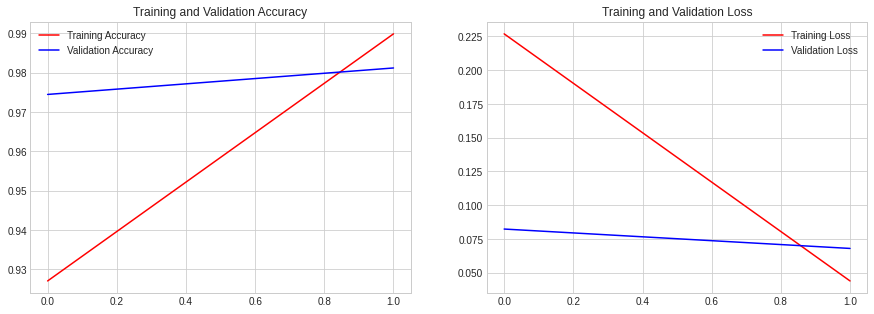

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.subplot(1, 2, 1)
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1, 2, 2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize = (15, 5))
  plot_acc(history)
  plot_loss(history)

plot_history(history)